# Problem 19.4

## Solution in Pyomo

In [41]:
from pyomo.environ import *

model = ConcreteModel()
model.P = Var(domain=NonNegativeReals)

# time per batch
tprod = 2.0*model.P**0.4
tnonprod = 14
tbatch = tprod + tnonprod

# number of batches required per year
nbatches = 300000/model.P

# costs
material_cost = 400000
storage_cost = 800*model.P**0.7
operating_cost = 50*tbatch*nbatches
costs = material_cost + storage_cost + operating_cost

# constraints
model.constraints = ConstraintList()
model.constraints.add(nbatches*tbatch <= 320*24)
model.objective = Objective(expr = costs, sense=minimize)

SolverFactory('ipopt').solve(model).write()
model.pprint()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 1
  Number of variables: 1
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.8\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.1290910243988037
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
1 Set Dec

In [29]:
P = model.P()
print('Size per batch =', round(P,2), 'lbs.')
print('Batches per year =', round(nbatches(),1))

print('Production time per batch =', round(tprod(),2), 'hrs')
print('Total time per batch =', round(tbatch(),2), 'hrs')
print('Total time per year =', round(tbatch()*nbatches()/24,2), 'days')

print('\nCost Analysis')
print(' Material costs = $', material_cost)
print('  Storage costs = $', round(storage_cost()))
print('Operating costs = $', round(operating_cost()))
print('    Total costs = $', round(costs()))

Size per batch = 3856.93 lbs.
Batches per year = 77.8
Production time per batch = 54.39 hrs
Total time per batch = 68.39 hrs
Total time per year = 221.65 days

Cost Analysis
 Material costs = $ 400000
  Storage costs = $ 259095
Operating costs = $ 265979
    Total costs = $ 925075


## Graphical Analysis

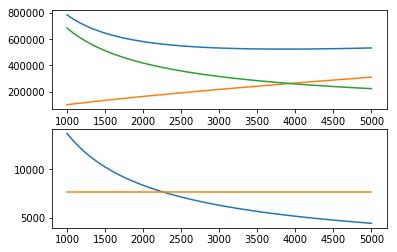

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

P = np.linspace(1000,5000)

# time per batch
tprod = 2.0*P**0.4
tnonprod = 14
tbatch = tprod + tnonprod

# number of batches required per year
nbatches = 300000/P

# costs
material_cost = 400000
storage_cost = 800*P**0.7
operating_cost = 50*tbatch*nbatches
variable_costs = storage_cost + operating_cost

plt.subplot(2,1,1)
plt.plot(P, variable_costs, P, storage_cost, P, operating_cost)

plt.subplot(2,1,2)
plt.plot(P, nbatches*tbatch)
plt.plot([min(P),max(P)], [320*24, 320*24])